In [24]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv('Data/Prices/MAINE.csv', usecols=['date', 'energy'])
df

,energy,Day sin,Day cos,Year sin,Year cos
0,34.86,2.504006e-13,1.000000,0.010364,0.999946
1,33.72,2.588190e-01,0.965926,0.011081,0.999939
2,32.40,5.000000e-01,0.866025,0.011798,0.999930
3,25.88,7.071068e-01,0.707107,0.012515,0.999922
4,29.65,8.660254e-01,0.500000,0.013231,0.999912
...,...,...,...,...,...
61332,33.34,-9.659258e-01,0.258819,-0.005218,0.999986
61333,34.53,-8.660254e-01,0.500000,-0.004501,0.999990
61334,32.16,-7.071068e-01,0.707107,-0.003785,0.999993
61335,27.93,-5.000000e-01,0.866025,-0.003068,0.999995


In [62]:
prices = df['energy'].to_numpy()

In [63]:
train_data = prices[:50000]

In [64]:
X_train, y_train = [], []

for i in range(24, len(train_data) - 24):
    X_train.append(train_data[i-24:i])
    y_train.append(train_data[i:i+24])

In [65]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [66]:
X_train.shape, y_train.shape

((49952, 24), (49952, 24))

In [30]:
from sklearn.preprocessing import MinMaxScaler

x_scaler = MinMaxScaler()

X_train = x_scaler.fit_transform(X_train)

In [31]:
y_scaler = MinMaxScaler()

y_train = y_scaler.fit_transform(y_train)

In [32]:
X_train.shape, y_train.shape

((49952, 24), (49952, 24))

In [33]:
X_train = X_train.reshape(49952, 24, 1)

In [34]:
X_train.shape

(49952, 24, 1)

In [35]:
test_data = prices[50000:]

In [36]:
X_test, y_test = [], []

for i in range(24, len(test_data) - 24):
    X_test.append(test_data[i-24:i])
    y_test.append(test_data[i:i+24])

In [37]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [38]:
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

In [39]:
X_test.shape

(11289, 24)

In [40]:
X_test = X_test.reshape(11289, 24, 1)

In [41]:
y_true = y_scaler.inverse_transform(y_test)

In [42]:
y_true

array([[60.03, 62.69, 73.18, ..., 53.29, 53.22, 53.09],
       [62.69, 73.18, 83.63, ..., 53.22, 53.09, 53.16],
       [73.18, 83.63, 90.18, ..., 53.09, 53.16, 55.54],
       ...,
       [36.51, 29.01, 27.52, ..., 42.56, 33.34, 34.53],
       [29.01, 27.52, 25.67, ..., 33.34, 34.53, 32.16],
       [27.52, 25.67, 23.88, ..., 34.53, 32.16, 27.93]])

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, InputLayer, Dense

lstm_model = Sequential([
    InputLayer(shape=(24, 1)),
    LSTM(units=128, activation='relu', return_sequences=True),
    LSTM(units=64, activation='relu', return_sequences=True),
    LSTM(units=32, activation='relu'),
    Dense(units=24)
])

In [47]:
lstm_model.compile(loss='mse', optimizer='adam')

In [48]:
history = lstm_model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10


2024-04-14 19:02:35.167922: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  37/1405 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0142

I0000 00:00:1713135756.073826   58151 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1405/1405 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0031 - val_loss: 0.0063
Epoch 2/10
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0015 - val_loss: 0.0055
Epoch 3/10
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0014 - val_loss: 0.0054
Epoch 4/10
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0013 - val_loss: 0.0047
Epoch 5/10
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0012 - val_loss: 0.0048
Epoch 6/10
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0011 - val_loss: 0.0044
Epoch 7/10
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0010 - val_loss: 0.0043
Epoch 8/10
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0010 - val_loss: 0.0044
Epoch 9/10
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0010 - val_loss: 0.0044
Epoch 10/10
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0010 - val_loss: 0.0045


In [49]:
y_pred = lstm_model.predict(X_test)

353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [50]:
y_pred = y_scaler.inverse_transform(y_pred)

In [51]:
y_pred

array([[63.78066 , 66.3327  , 70.03257 , ..., 57.998344, 56.71553 ,
        56.916573],
       [67.09141 , 73.13791 , 77.83218 , ..., 56.1236  , 56.77875 ,
        57.8084  ],
       [69.61259 , 76.12338 , 77.620056, ..., 55.607647, 57.19582 ,
        59.782936],
       ...,
       [30.790398, 28.69503 , 25.652145, ..., 37.34521 , 36.3297  ,
        34.8577  ],
       [34.031376, 30.941711, 27.299473, ..., 40.014942, 39.192554,
        37.985706],
       [26.756678, 24.875395, 22.474009, ..., 37.401596, 35.20005 ,
        32.116253]], dtype=float32)

In [52]:
np.average(abs(y_true - y_pred)/y_true)

0.2009730286922898

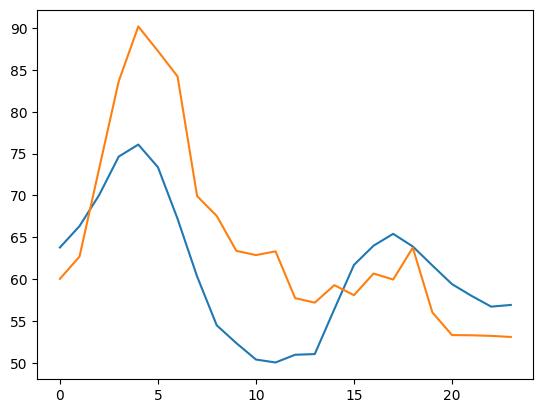

In [55]:
plt.plot(y_pred[0])
plt.plot(y_true[0])